In [1]:
## Install the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


In [2]:
df = pd.read_csv('Dataset.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
df.shape

(614, 13)

In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
# Checking the Outliers
# Assuming df is your preprocessed dataset
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

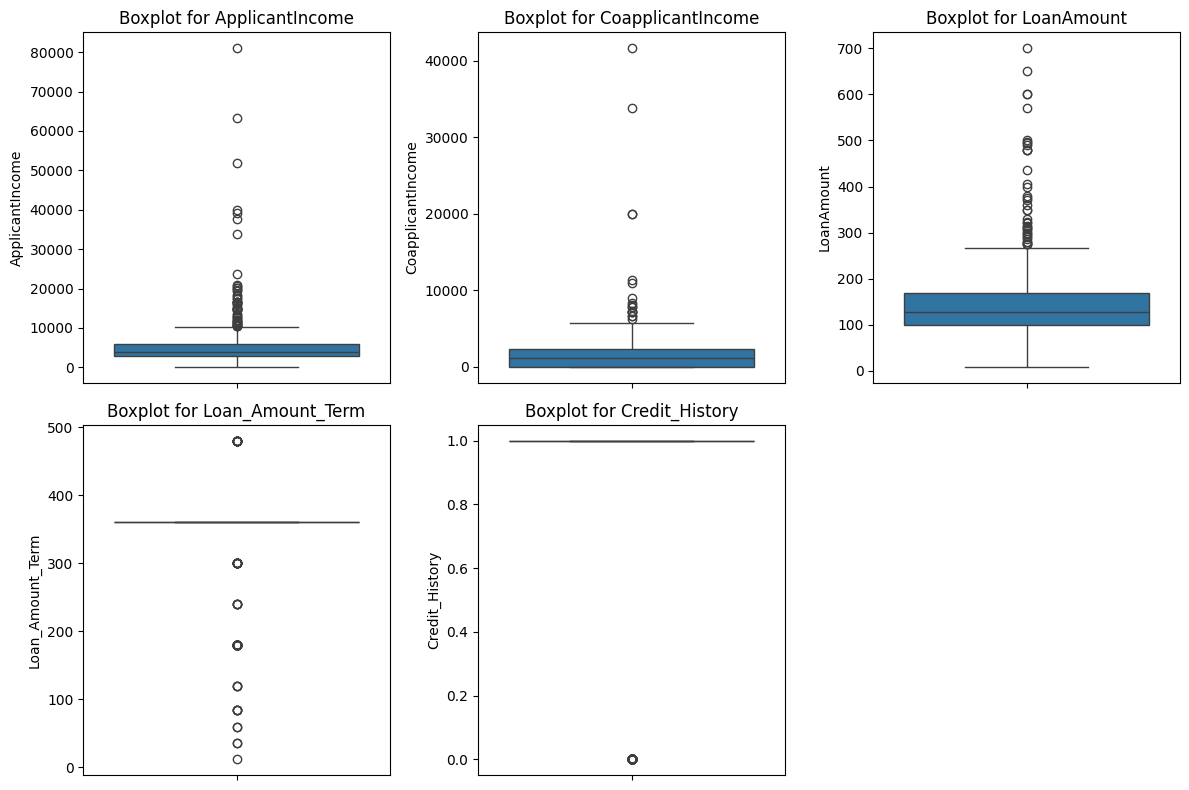

In [10]:
# Plotting boxplots for each numerical column
plt.figure(figsize=(12,8))

# Using subplots to display multiple boxplots in a grid
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)  # Adjust the grid size based on the number of plots you want
    sns.boxplot(df[column])
    plt.title(f'Boxplot for {column}')

plt.tight_layout()  # Adjust the layout so plots don’t overlap
plt.show()

In [11]:
# Fill missing values in 'LoanAmount' with the median
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
# Fill missing values in 'Loan_Amount_Term' with the mean
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
# Fill missing values in 'Credit_History' with the mean
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())


In [12]:
# Fill missing values in 'Gender' with the most frequent value
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
# Fill missing values in 'Married' with the most frequent value
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
# Fill missing values in 'Dependents' with the most frequent value
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
# Fill missing values in 'Self_Employed' with the most frequent value
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])


In [13]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Number of people who took loan by gender
Gender
Male      502
Female    112
Name: count, dtype: int64


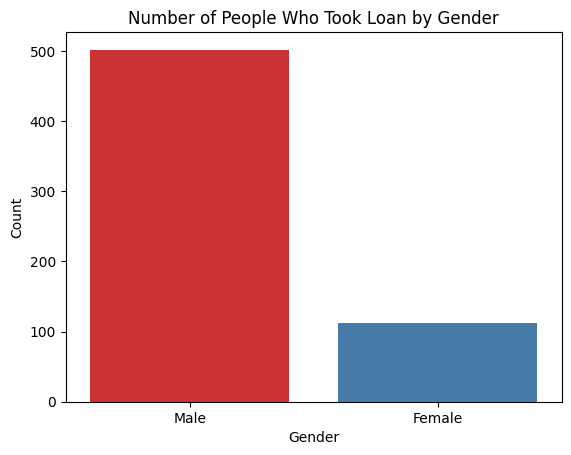

In [14]:
# Print the number of people who applied for loans by gender
print('Number of people who took loan by gender')
print(df['Gender'].value_counts())
# Creating the count plot
sns.countplot(x='Gender', data=df, palette='Set1')

# Adding labels and title
plt.title('Number of People Who Took Loan by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Show the plot
plt.show()

Number of people who took loan by marital status
Married
Yes    401
No     213
Name: count, dtype: int64


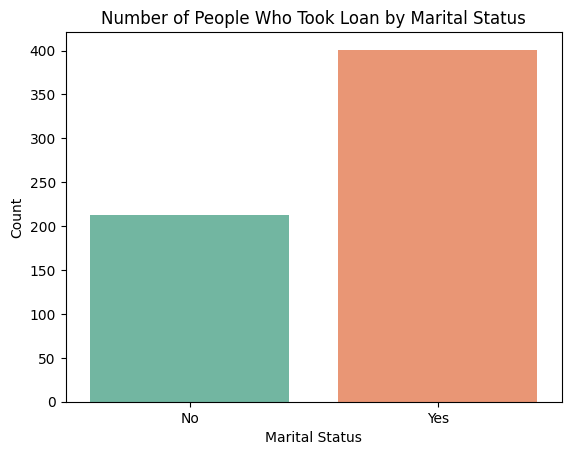

In [15]:
# Print the number of people who took loans by marital status
print('Number of people who took loan by marital status')
print(df['Married'].value_counts())
# Creating the count plot
sns.countplot(x='Married', data=df, palette='Set2')

# Adding labels and title
plt.title('Number of People Who Took Loan by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')

# Show the plot
plt.show()

Number of people who took loan by education:
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


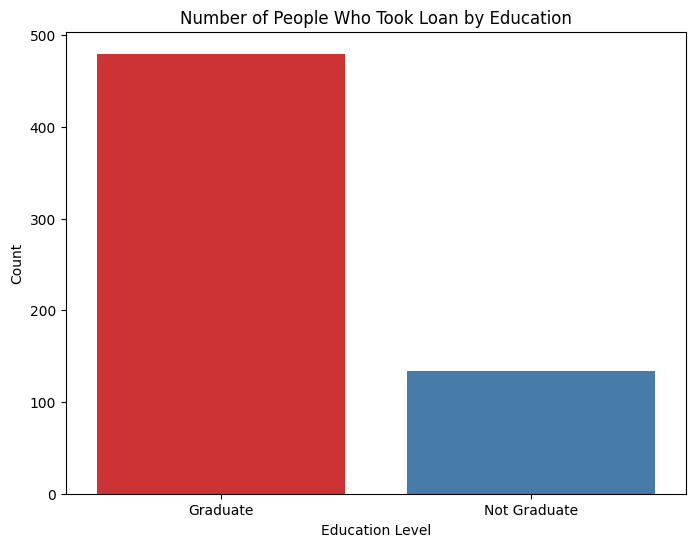

In [20]:
# Print the number of people who took loans by education
print('Number of people who took loan by education:')
print(df['Education'].value_counts())

# Creating the count plot
plt.figure(figsize=(8, 6))  # Optional: Set figure size for consistency
sns.countplot(x='Education', data=df, palette='Set1')

# Adding labels and title
plt.title('Number of People Who Took Loan by Education')
plt.xlabel('Education Level')
plt.ylabel('Count')

# Show the plot
plt.show()


In [21]:
# Calculate total applicant income for each entry
df['Total_Applicant_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

# Display the first few rows of the updated DataFrame to see the new column
print(df[['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'Total_Applicant_Income']].head())


    Loan_ID  ApplicantIncome  CoapplicantIncome  Total_Applicant_Income
0  LP001002             5849                0.0                  5849.0
1  LP001003             4583             1508.0                  6091.0
2  LP001005             3000                0.0                  3000.0
3  LP001006             2583             2358.0                  4941.0
4  LP001008             6000                0.0                  6000.0


In [24]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Applicant_Income,ApplicantIncomelog
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.430327
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,7.857094
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699681


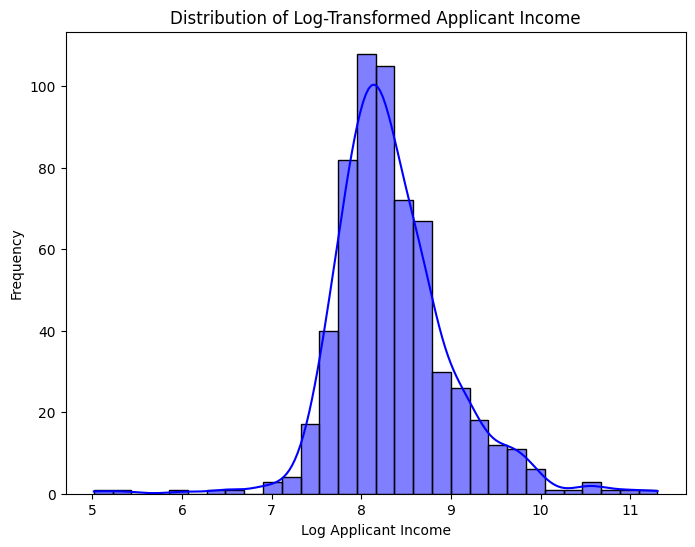

In [25]:
# Apply log transformation to Applicant Income
df['ApplicantIncomelog'] = np.log(df['ApplicantIncome'] + 1)

# Create a distribution plot for the log-transformed income
plt.figure(figsize=(8, 6))
sns.histplot(df['ApplicantIncomelog'], kde=True, color='blue', bins=30)

# Adding labels and title
plt.title('Distribution of Log-Transformed Applicant Income')
plt.xlabel('Log Applicant Income')
plt.ylabel('Frequency')

# Show the plot
plt.show()

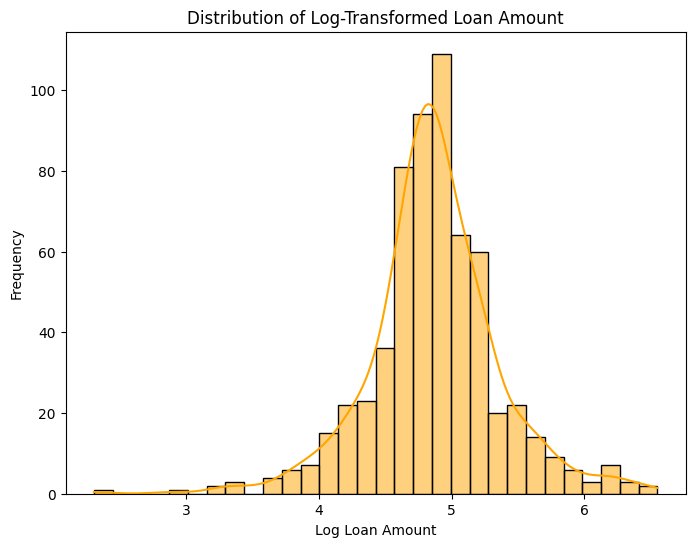

In [26]:
# Apply log transformation to Loan Amount
df['LoanAmountLog'] = np.log(df['LoanAmount'] + 1)

# Create a distribution plot for the log-transformed Loan Amount
plt.figure(figsize=(8, 6))
sns.histplot(df['LoanAmountLog'], kde=True, color='orange', bins=30)

# Adding labels and title
plt.title('Distribution of Log-Transformed Loan Amount')
plt.xlabel('Log Loan Amount')
plt.ylabel('Frequency')

# Show the plot
plt.show()

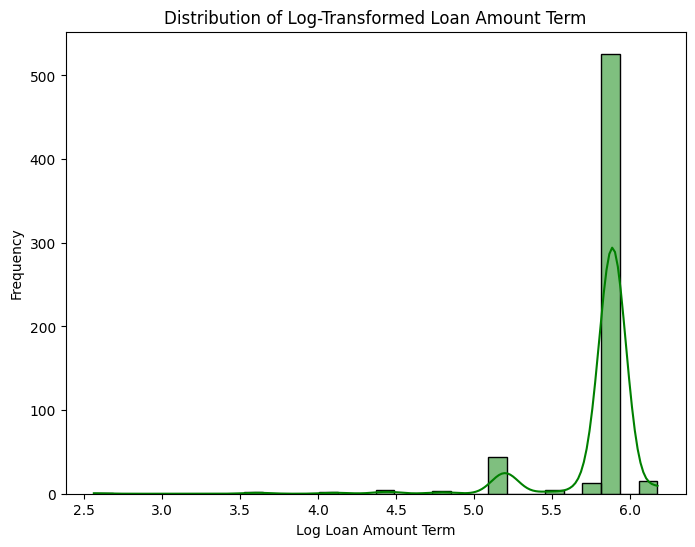

In [27]:
# Apply log transformation to Loan Amount Term
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term'] + 1)

# Create a distribution plot for the log-transformed Loan Amount Term
plt.figure(figsize=(8, 6))
sns.histplot(df['Loan_Amount_Term_Log'], kde=True, color='green', bins=30)

# Adding labels and title
plt.title('Distribution of Log-Transformed Loan Amount Term')
plt.xlabel('Log Loan Amount Term')
plt.ylabel('Frequency')

# Show the plot
plt.show()


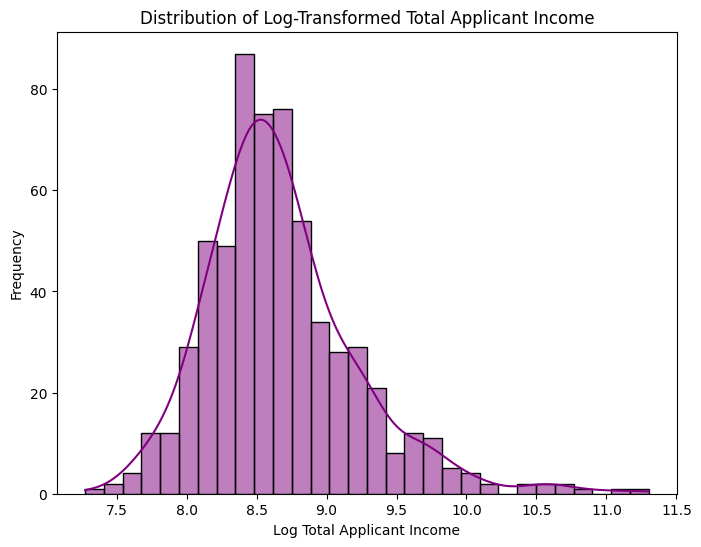

In [28]:
# Apply log transformation to Total Applicant Income
df['Total_Applicant_Income_Log'] = np.log(df['Total_Applicant_Income'] + 1)

# Create a distribution plot for the log-transformed Total Applicant Income
plt.figure(figsize=(8, 6))
sns.histplot(df['Total_Applicant_Income_Log'], kde=True, color='purple', bins=30)

# Adding labels and title
plt.title('Distribution of Log-Transformed Total Applicant Income')
plt.xlabel('Log Total Applicant Income')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [29]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Applicant_Income,ApplicantIncomelog,LoanAmountLog,Loan_Amount_Term_Log,Total_Applicant_Income_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,8.674197,4.859812,5.888878,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.430327,4.859812,5.888878,8.714732
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006701,4.204693,5.888878,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,7.857094,4.795791,5.888878,8.505525
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699681,4.955827,5.888878,8.699681


In [32]:
# Check existing columns
print(df.columns)

# List of columns to drop (modify this based on existing columns)
columns_to_drop = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income','Loan_ID']  # Remove 'Total_Income' if it doesn't exist

# Drop the specified columns
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')  # 'ignore' to avoid KeyError for non-existing columns

# Display the updated DataFrame to verify the changes
df.head()


Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Applicant_Income', 'ApplicantIncomelog', 'LoanAmountLog',
       'Loan_Amount_Term_Log', 'Total_Applicant_Income_Log'],
      dtype='object')


,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Total_Applicant_Income,ApplicantIncomelog,LoanAmountLog,Loan_Amount_Term_Log,Total_Applicant_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,5849.0,8.674197,4.859812,5.888878,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,6091.0,8.430327,4.859812,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,3000.0,8.006701,4.204693,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,4941.0,7.857094,4.795791,5.888878,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,6000.0,8.699681,4.955827,5.888878,8.699681


In [34]:
## Encoding Technique: Label Encoding

from sklearn.preprocessing import LabelEncoder

# Specify the columns to be label encoded
cols = ['Gender', 'Married', 'Education', 'Dependents', 'Self_Employed', 'Property_Area', 'Loan_Status']

# Initialize the LabelEncoder
le = LabelEncoder()

# Apply label encoding to each specified column
for col in cols:
    df[col] = le.fit_transform(df[col])

# Display the first few rows of the updated DataFrame to verify encoding
df.head()


,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Total_Applicant_Income,ApplicantIncomelog,LoanAmountLog,Loan_Amount_Term_Log,Total_Applicant_Income_Log
0,1,0,0,0,0,1.0,2,1,5849.0,8.674197,4.859812,5.888878,8.674197
1,1,1,1,0,0,1.0,0,0,6091.0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,1,3000.0,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,1,4941.0,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,1,6000.0,8.699681,4.955827,5.888878,8.699681


In [35]:
df.dtypes

Gender                          int64
Married                         int64
Dependents                      int64
Education                       int64
Self_Employed                   int64
Credit_History                float64
Property_Area                   int64
Loan_Status                     int64
Total_Applicant_Income        float64
ApplicantIncomelog            float64
LoanAmountLog                 float64
Loan_Amount_Term_Log          float64
Total_Applicant_Income_Log    float64
dtype: object

In [36]:
## Split Independent and Dependent Features

# Define the independent features (X) by dropping the target variable 'Loan_Status'
X = df.drop(columns=['Loan_Status'], axis=1)

# Define the dependent feature (y) as the target variable 'Loan_Status'
y = df['Loan_Status']

# Display the shapes of X and y to verify the split
print("Shape of X (Independent Features):", X.shape)
print("Shape of y (Dependent Feature):", y.shape)


Shape of X (Independent Features): (614, 12)
Shape of y (Dependent Feature): (614,)


In [37]:
## Check Accuracy with Logistic Regression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the Logistic Regression model
model1 = LogisticRegression(max_iter=1000)  # Increase max_iter if needed

# Fit the model on the training data
model1.fit(X_train, y_train)

# Make predictions on the test data
y_pred_model1 = model1.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_model1)

# Print accuracy
print(f'Accuracy of Logistic Regression: {accuracy * 100:.2f}%')

Accuracy of Logistic Regression: 76.62%


In [38]:
## Cross-Validation Accuracy with Logistic Regression

from sklearn.model_selection import cross_val_score
import numpy as np

# Perform cross-validation with 5 folds
score = cross_val_score(model1, X, y, cv=5)

# Calculate the mean accuracy from the cross-validation scores
mean_accuracy = np.mean(score) * 100

# Print the cross-validation scores and mean accuracy
print("Cross-Validation Scores:", score)
print(f'Mean Accuracy of Logistic Regression (Cross-Validation): {mean_accuracy:.2f}%')


Cross-Validation Scores: [0.81300813 0.77235772 0.7804878  0.85365854 0.81967213]
Mean Accuracy of Logistic Regression (Cross-Validation): 80.78%


In [39]:
## Check Accuracy with Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier model
model2 = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
model2.fit(X_train, y_train)

# Make predictions on the test data
y_pred_model2 = model2.predict(X_test)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_model2)

# Print accuracy
print(f'Accuracy of Decision Tree Classifier: {accuracy_dt * 100:.2f}%')


Accuracy of Decision Tree Classifier: 70.78%


In [40]:
## Cross-Validation Accuracy with Decision Tree Classifier

from sklearn.model_selection import cross_val_score
import numpy as np

# Initialize the Decision Tree Classifier model
model2 = DecisionTreeClassifier(random_state=42)

# Perform cross-validation with 5 folds
score_dt = cross_val_score(model2, X, y, cv=5)

# Calculate the mean accuracy from the cross-validation scores
mean_accuracy_dt = np.mean(score_dt) * 100

# Print the cross-validation scores and mean accuracy
print("Cross-Validation Scores for Decision Tree Classifier:", score_dt)
print(f'Mean Accuracy of Decision Tree Classifier (Cross-Validation): {mean_accuracy_dt:.2f}%')


Cross-Validation Scores for Decision Tree Classifier: [0.67479675 0.71544715 0.65853659 0.72357724 0.7295082 ]
Mean Accuracy of Decision Tree Classifier (Cross-Validation): 70.04%


In [43]:
## Check Accuracy with Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier model
model3 = RandomForestClassifier(random_state=42)

# Fit the model on the training data
model3.fit(X_train, y_train)

# Make predictions on the test data
y_pred_model3 = model3.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_model3)

# Print accuracy
print(f'Accuracy of Random Forest Classifier: {accuracy_rf * 100:.2f}%')


Accuracy of Random Forest Classifier: 77.92%


In [44]:
## Cross-Validation Accuracy with Random Forest Classifier

from sklearn.model_selection import cross_val_score
import numpy as np

# Initialize the Random Forest Classifier model
model3 = RandomForestClassifier(random_state=42)

# Perform cross-validation with 5 folds
score_rf = cross_val_score(model3, X, y, cv=5)

# Calculate the mean accuracy from the cross-validation scores
mean_accuracy_rf = np.mean(score_rf) * 100

# Print the cross-validation scores and mean accuracy
print("Cross-Validation Scores for Random Forest Classifier:", score_rf)
print(f'Mean Accuracy of Random Forest Classifier (Cross-Validation): {mean_accuracy_rf:.2f}%')


Cross-Validation Scores for Random Forest Classifier: [0.77235772 0.75609756 0.7804878  0.82113821 0.81147541]
Mean Accuracy of Random Forest Classifier (Cross-Validation): 78.83%


In [46]:
## Check Accuracy with K-Nearest Neighbors Classifier

from sklearn.neighbors import KNeighborsClassifier

# Initialize the K-Nearest Neighbors model
model4 = KNeighborsClassifier()

# Fit the model on the training data
model4.fit(X_train, y_train)

# Make predictions on the test data
y_pred_model4 = model4.predict(X_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_model4)

# Print accuracy
print(f'Accuracy of K-Nearest Neighbors Classifier: {accuracy_knn * 100:.2f}%')


Accuracy of K-Nearest Neighbors Classifier: 59.09%


In [47]:
## Cross-Validation Accuracy with K-Nearest Neighbors Classifier

from sklearn.model_selection import cross_val_score
import numpy as np

# Initialize the K-Nearest Neighbors model
model4 = KNeighborsClassifier()

# Perform cross-validation with 5 folds
score_knn = cross_val_score(model4, X, y, cv=5)

# Calculate the mean accuracy from the cross-validation scores
mean_accuracy_knn = np.mean(score_knn) * 100

# Print the cross-validation scores and mean accuracy
print("Cross-Validation Scores for K-Nearest Neighbors Classifier:", score_knn)
print(f'Mean Accuracy of K-Nearest Neighbors Classifier (Cross-Validation): {mean_accuracy_knn:.2f}%')


Cross-Validation Scores for K-Nearest Neighbors Classifier: [0.6504065  0.57723577 0.61788618 0.6097561  0.6147541 ]
Mean Accuracy of K-Nearest Neighbors Classifier (Cross-Validation): 61.40%


In [48]:
from sklearn.metrics import classification_report

# Function to generate and print the classification report for a given model
def generate_classification_report(model_name, y_test, y_pred):
    report = classification_report(y_test, y_pred)
    print(f"Classification Report For {model_name}:\n{report}\n")

# Logistic Regression
generate_classification_report('Logistic Regression', y_test, y_pred_model1)

# Decision Tree Classifier
generate_classification_report('Decision Tree Classifier', y_test, y_pred_model2)

# Random Forest Classifier
generate_classification_report('Random Forest Classifier', y_test, y_pred_model3)

# K-Nearest Neighbors Classifier
generate_classification_report('K-Nearest Neighbors Classifier', y_test, y_pred_model4)


Classification Report For Logistic Regression:
              precision    recall  f1-score   support

           0       0.88      0.39      0.54        54
           1       0.75      0.97      0.84       100

    accuracy                           0.77       154
   macro avg       0.81      0.68      0.69       154
weighted avg       0.79      0.77      0.74       154


Classification Report For Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.60      0.50      0.55        54
           1       0.75      0.82      0.78       100

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154


Classification Report For Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.83      0.46      0.60        54
           1       0.77      0.95      0.85       100

    accuracy                 

In [49]:
df['Loan_Status'].value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [50]:
pip install -U imbalanced-learn


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [52]:
## Importing Required Libraries
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
from sklearn.model_selection import train_test_split

# Initialize RandomOverSampler
oversample = RandomOverSampler(random_state=42)

# Fit and resample the data
X_resampled, y_resampled = oversample.fit_resample(X, y)

# Combine resampled features and target into a new DataFrame
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name="Loan_Status")], axis=1)

# Display the resampled feature set and target
print("Resampled Features (X):")
print(X_resampled)
print("\nResampled Target (y):")
print(y_resampled)

# Display the count of each class in the resampled target
print("\nValue Counts of Resampled Target:")
print(y_resampled.value_counts())

# Split the resampled data into training and testing sets
X_resampled_train, X_resampled_test, y_resampled_train, y_resampled_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)


Resampled Features (X):
     Gender  Married  Dependents  Education  Self_Employed  Credit_History  \
0         1        0           0          0              0        1.000000   
1         1        1           1          0              0        1.000000   
2         1        1           0          0              1        1.000000   
3         1        1           0          1              0        1.000000   
4         1        0           0          0              0        1.000000   
..      ...      ...         ...        ...            ...             ...   
839       1        1           3          1              0        1.000000   
840       1        1           1          0              0        0.842199   
841       1        1           1          0              0        0.000000   
842       1        1           2          1              0        0.000000   
843       1        0           0          0              0        0.000000   

     Property_Area  Total_Applicant_Inc

In [53]:
## Check Accuracy with Logistic Regression on Resampled Data

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the Logistic Regression model
model1 = LogisticRegression()

# Fit the model on the resampled training data
model1.fit(X_resampled_train, y_resampled_train)

# Make predictions on the resampled test data
y_pred_model1 = model1.predict(X_resampled_test)

# Calculate accuracy
accuracy_model1 = accuracy_score(y_resampled_test, y_pred_model1)

# Print accuracy
print(f'Accuracy of Logistic Regression on Resampled Data: {accuracy_model1 * 100:.2f}%')


Accuracy of Logistic Regression on Resampled Data: 70.14%


In [54]:
## Check Accuracy with Decision Tree Classifier on Resampled Data

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the Decision Tree Classifier model
model2 = DecisionTreeClassifier(random_state=42)

# Fit the model on the resampled training data
model2.fit(X_resampled_train, y_resampled_train)

# Make predictions on the resampled test data
y_pred_model2 = model2.predict(X_resampled_test)

# Calculate accuracy
accuracy_model2 = accuracy_score(y_resampled_test, y_pred_model2)

# Print accuracy
print(f'Accuracy of Decision Tree Classifier on Resampled Data: {accuracy_model2 * 100:.2f}%')


Accuracy of Decision Tree Classifier on Resampled Data: 81.04%


In [55]:
## Check Accuracy with Random Forest Classifier on Resampled Data

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest Classifier model
model3 = RandomForestClassifier(random_state=42)

# Fit the model on the resampled training data
model3.fit(X_resampled_train, y_resampled_train)

# Make predictions on the resampled test data
y_pred_model3 = model3.predict(X_resampled_test)

# Calculate accuracy
accuracy_model3 = accuracy_score(y_resampled_test, y_pred_model3)

# Print accuracy
print(f'Accuracy of Random Forest Classifier on Resampled Data: {accuracy_model3 * 100:.2f}%')


Accuracy of Random Forest Classifier on Resampled Data: 88.15%


In [56]:
## Check Accuracy with K-Nearest Neighbors Classifier on Resampled Data

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize the K-Nearest Neighbors Classifier model
model4 = KNeighborsClassifier()

# Fit the model on the resampled training data
model4.fit(X_resampled_train, y_resampled_train)

# Make predictions on the resampled test data
y_pred_model4 = model4.predict(X_resampled_test)

# Calculate accuracy
accuracy_model4 = accuracy_score(y_resampled_test, y_pred_model4)

# Print accuracy
print(f'Accuracy of K-Nearest Neighbors Classifier on Resampled Data: {accuracy_model4 * 100:.2f}%')


Accuracy of K-Nearest Neighbors Classifier on Resampled Data: 58.77%


In [57]:
## Comparing Accuracy of Models on Original and Resampled Data

# Define a function to evaluate model accuracy
def evaluate_model_accuracy(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy * 100

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Original data accuracy
print("Accuracy on Original Data:")
for model_name, model in models.items():
    accuracy_original = evaluate_model_accuracy(model, X_train, y_train, X_test, y_test)
    print(f'{model_name}: {accuracy_original:.2f}%')

# Resampled data accuracy
print("\nAccuracy on Resampled Data:")
for model_name, model in models.items():
    accuracy_resampled = evaluate_model_accuracy(model, X_resampled_train, y_resampled_train, X_resampled_test, y_resampled_test)
    print(f'{model_name}: {accuracy_resampled:.2f}%')


Accuracy on Original Data:
Logistic Regression: 77.27%
Decision Tree: 70.78%
Random Forest: 77.92%
K-Nearest Neighbors: 59.09%

Accuracy on Resampled Data:
Logistic Regression: 70.14%
Decision Tree: 81.04%
Random Forest: 88.15%
K-Nearest Neighbors: 58.77%


In [58]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
## Check Accuracy with Gradient Boosting Classifier on Resampled Data

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Initialize the Gradient Boosting Classifier model
model5 = GradientBoostingClassifier(random_state=42)

# Fit the model on the resampled training data
model5.fit(X_resampled_train, y_resampled_train)

# Make predictions on the resampled test data
y_pred_model5 = model5.predict(X_resampled_test)

# Calculate accuracy
accuracy_model5 = accuracy_score(y_resampled_test, y_pred_model5)

# Print accuracy
print(f'Accuracy of Gradient Boosting Classifier on Resampled Data: {accuracy_model5 * 100:.2f}%')


Accuracy of Gradient Boosting Classifier on Resampled Data: 79.62%


In [60]:
## Check Accuracy with AdaBoost Classifier on Resampled Data

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Initialize the AdaBoost Classifier model
model6 = AdaBoostClassifier(random_state=42)

# Fit the model on the resampled training data
model6.fit(X_resampled_train, y_resampled_train)

# Make predictions on the resampled test data
y_pred_model6 = model6.predict(X_resampled_test)

# Calculate accuracy
accuracy_model6 = accuracy_score(y_resampled_test, y_pred_model6)

# Print accuracy
print(f'Accuracy of AdaBoost Classifier on Resampled Data: {accuracy_model6 * 100:.2f}%')


Accuracy of AdaBoost Classifier on Resampled Data: 78.67%


In [61]:
## Check Accuracy with Support Vector Classifier on Resampled Data

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize the Support Vector Classifier model
model7 = SVC(random_state=42)

# Fit the model on the resampled training data
model7.fit(X_resampled_train, y_resampled_train)

# Make predictions on the resampled test data
y_pred_model7 = model7.predict(X_resampled_test)

# Calculate accuracy
accuracy_model7 = accuracy_score(y_resampled_test, y_pred_model7)

# Print accuracy
print(f'Accuracy of Support Vector Classifier on Resampled Data: {accuracy_model7 * 100:.2f}%')


Accuracy of Support Vector Classifier on Resampled Data: 50.71%


In [62]:
## Check Accuracy with XGBoost Classifier on Resampled Data

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Initialize the XGBoost Classifier model
model8 = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fit the model on the resampled training data
model8.fit(X_resampled_train, y_resampled_train)

# Make predictions on the resampled test data
y_pred_model8 = model8.predict(X_resampled_test)

# Calculate accuracy
accuracy_model8 = accuracy_score(y_resampled_test, y_pred_model8)

# Print accuracy
print(f'Accuracy of XGBoost Classifier on Resampled Data: {accuracy_model8 * 100:.2f}%')


Accuracy of XGBoost Classifier on Resampled Data: 84.36%


In [65]:
# Store accuracies for all models checked on original and resampled data
accuracies = {
    'Logistic Regression': accuracy_model1,
    'Decision Tree': accuracy_model2,
    'Random Forest': accuracy_model3,
    'KNeighbors': accuracy_model4,
    'Gradient Boosting': accuracy_model5,
    'AdaBoost': accuracy_model6,
    'SVC': accuracy_model7,
    'XGBoost': accuracy_model8,
}

# Create a DataFrame to hold the model names and their corresponding accuracies
results_df = pd.DataFrame(list(accuracies.items()), columns=['Model', 'Accuracy'])

# Convert accuracy to percentage
results_df['Accuracy'] = results_df['Accuracy'] * 100

# Display the results
print(results_df)

                 Model   Accuracy
0  Logistic Regression  70.142180
1        Decision Tree  81.042654
2        Random Forest  88.151659
3           KNeighbors  58.767773
4    Gradient Boosting  79.620853
5             AdaBoost  78.672986
6                  SVC  50.710900
7              XGBoost  84.360190


In [66]:
from sklearn.metrics import classification_report

def generate_classification_report(model_name, y_test, y_pred):
    report = classification_report(y_test, y_pred)
    print(f"Classification Report For {model_name}:\n{report}\n")

# Generate classification reports for each model using the resampled test data
generate_classification_report('Logistic Regression', y_resampled_test, y_pred_model1)
generate_classification_report('Decision Tree', y_resampled_test, y_pred_model2)
generate_classification_report('Random Forest', y_resampled_test, y_pred_model3)
generate_classification_report('KNeighbors', y_resampled_test, y_pred_model4)
generate_classification_report('Gradient Boosting', y_resampled_test, y_pred_model5)
generate_classification_report('AdaBoost', y_resampled_test, y_pred_model6)
generate_classification_report('SVC', y_resampled_test, y_pred_model7)
generate_classification_report('XGBoost', y_resampled_test, y_pred_model8)


Classification Report For Logistic Regression:
              precision    recall  f1-score   support

           0       0.85      0.54      0.66       114
           1       0.62      0.89      0.73        97

    accuracy                           0.70       211
   macro avg       0.74      0.72      0.70       211
weighted avg       0.75      0.70      0.69       211


Classification Report For Decision Tree:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       114
           1       0.82      0.75      0.78        97

    accuracy                           0.81       211
   macro avg       0.81      0.81      0.81       211
weighted avg       0.81      0.81      0.81       211


Classification Report For Random Forest:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       114
           1       0.85      0.90      0.87        97

    accuracy                           0.88       2

In [67]:
import joblib

# Save the Random Forest model
joblib.dump(model3, 'random_forest_model.pkl')

print("Random Forest model saved as 'random_forest_model.pkl'")


Random Forest model saved as 'random_forest_model.pkl'


In [68]:
# Load the Random Forest model
loaded_model = joblib.load('random_forest_model.pkl')

print("Random Forest model loaded successfully")


Random Forest model loaded successfully


In [73]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Total_Applicant_Income,ApplicantIncomelog,LoanAmountLog,Loan_Amount_Term_Log,Total_Applicant_Income_Log
0,1,0,0,0,0,1.0,2,1,5849.0,8.674197,4.859812,5.888878,8.674197
1,1,1,1,0,0,1.0,0,0,6091.0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,1,3000.0,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,1,4941.0,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,1,6000.0,8.699681,4.955827,5.888878,8.699681


In [1]:
import pandas as pd
import joblib
import numpy as np

# Load the saved model
best_model = joblib.load('random_forest_model.pkl')

# Function to convert string inputs to binary
def convert_input_to_binary(user_input, options):
    return options.get(user_input, -1)  # Return -1 for invalid inputs

# Function to get user input and predict loan status and eligible loan amount
def real_time_prediction():
    try:
        # Collect user input as strings
        gender_input = input("Enter Gender (Male or Female): ")
        married_input = input("Enter Marital Status (Yes or No): ")
        dependents_input = input("Enter Number of Dependents (0, 1, 2, 3+): ")
        education_input = input("Enter Education Status (Graduate or Not Graduate): ")
        self_employed_input = input("Enter Self Employed Status (Yes or No): ")
        credit_history_input = input("Enter Credit History (Yes or No): ")
        property_area_input = input("Enter Property Area (Rural, Semiurban, Urban): ")
        
        # Collect income and loan details
        applicant_income = float(input("Enter Applicant Income: "))
        loan_amount = float(input("Enter Loan Amount Requested: "))
        loan_amount_term = float(input("Enter Loan Amount Term (in months): "))
        
        # Convert string inputs to binary format
        gender = convert_input_to_binary(gender_input, {'Male': 0, 'Female': 1})
        married = convert_input_to_binary(married_input, {'Yes': 1, 'No': 0})
        dependents_numeric = int(dependents_input) if dependents_input != '3+' else 3
        education = convert_input_to_binary(education_input, {'Graduate': 1, 'Not Graduate': 0})
        self_employed = convert_input_to_binary(self_employed_input, {'Yes': 1, 'No': 0})
        credit_history = convert_input_to_binary(credit_history_input, {'Yes': 1, 'No': 0})
        property_area = convert_input_to_binary(property_area_input, {'Rural': 0, 'Semiurban': 1, 'Urban': 2})
        
        # Calculate Total Applicant Income
        Total_Applicant_Income = applicant_income + loan_amount
        
        # Apply log transformations
        ApplicantIncomeLog = np.log(applicant_income + 1)  # Avoid log(0)
        LoanAmountLog = np.log(loan_amount + 1)  # Avoid log(0)
        Loan_Amount_Term_Log = np.log(loan_amount_term + 1)  # Avoid log(0)
        Total_Applicant_Income_Log = np.log(Total_Applicant_Income + 1)  # Avoid log(0)

        # Create a DataFrame from user input with matching feature names
        input_data = pd.DataFrame({
            'Gender': [gender],
            'Married': [married],
            'Dependents': [dependents_numeric],
            'Education': [education],
            'Self_Employed': [self_employed],
            'Credit_History': [credit_history],
            'Property_Area': [property_area],
            'Total_Applicant_Income': [Total_Applicant_Income],
            'ApplicantIncomelog': [ApplicantIncomeLog],       # Make sure to match the exact name
            'LoanAmountLog': [LoanAmountLog],                  # Ensure case matches
            'Loan_Amount_Term_Log': [Loan_Amount_Term_Log],      # Ensure case matches
            'Total_Applicant_Income_Log': [Total_Applicant_Income_Log]  # Ensure case matches
        })

        # Make prediction
        prediction = best_model.predict(input_data)
        status = prediction[0]

        if status == 0:
            result = "Rejected"
            adjusted_loan_amount = 0.0  # No loan amount if rejected
        elif status == 1:
            result = "Approved"
            # Calculate the adjusted loan amount based on the number of dependents
            adjustment_factor = max(0.7, 1 - (0.1 * dependents_numeric))  # Minimum adjustment factor is 0.7 (30% reduction)
            adjusted_loan_amount = loan_amount * adjustment_factor

        # Display prediction results
        print(f"Loan Status Prediction: {result}")
        if result == "Approved":
            print(f"Eligible Loan Amount: {adjusted_loan_amount:.2f} out of {loan_amount:.2f}")
        else:
            print("Loan Application Rejected, no loan amount will be disbursed.")

    except ValueError as e:
        print(f"Invalid input. Error: {e}")

# Call the prediction function
real_time_prediction()

Loan Status Prediction: Approved
Eligible Loan Amount: 4800000.00 out of 6000000.00


In [1]:
import pandas as pd
import joblib
import numpy as np
from datetime import datetime

# Load the saved model
best_model = joblib.load('random_forest_model.pkl')

# Function to convert string inputs to binary
def convert_input_to_binary(user_input, options):
    return options.get(user_input, -1)  # Return -1 for invalid inputs

# Function to log data into test.csv and predict loan status and eligible loan amount
def real_time_prediction():
    try:
        # Collect user input as strings
        gender_input = input("Enter Gender (Male or Female): ")
        married_input = input("Enter Marital Status (Yes or No): ")
        dependents_input = input("Enter Number of Dependents (0, 1, 2, 3+): ")
        education_input = input("Enter Education Status (Graduate or Not Graduate): ")
        self_employed_input = input("Enter Self Employed Status (Yes or No): ")
        credit_history_input = input("Enter Credit History (Yes or No): ")
        property_area_input = input("Enter Property Area (Rural, Semiurban, Urban): ")
        
        # Collect income and loan details
        applicant_income = float(input("Enter Applicant Income: "))
        loan_amount = float(input("Enter Loan Amount Requested: "))
        loan_amount_term = float(input("Enter Loan Amount Term (in months): "))
        
        # Convert string inputs to binary format
        gender = convert_input_to_binary(gender_input, {'Male': 0, 'Female': 1})
        married = convert_input_to_binary(married_input, {'Yes': 1, 'No': 0})
        dependents_numeric = int(dependents_input) if dependents_input != '3+' else 3
        education = convert_input_to_binary(education_input, {'Graduate': 1, 'Not Graduate': 0})
        self_employed = convert_input_to_binary(self_employed_input, {'Yes': 1, 'No': 0})
        credit_history = convert_input_to_binary(credit_history_input, {'Yes': 1, 'No': 0})
        property_area = convert_input_to_binary(property_area_input, {'Rural': 0, 'Semiurban': 1, 'Urban': 2})
        
        # Calculate Total Applicant Income
        Total_Applicant_Income = applicant_income + loan_amount
        
        # Apply log transformations
        ApplicantIncomeLog = np.log(applicant_income + 1)  # Avoid log(0)
        LoanAmountLog = np.log(loan_amount + 1)  # Avoid log(0)
        Loan_Amount_Term_Log = np.log(loan_amount_term + 1)  # Avoid log(0)
        Total_Applicant_Income_Log = np.log(Total_Applicant_Income + 1)  # Avoid log(0)

        # Create a DataFrame from user input with matching feature names
        input_data = pd.DataFrame({
            'Gender': [gender],
            'Married': [married],
            'Dependents': [dependents_numeric],
            'Education': [education],
            'Self_Employed': [self_employed],
            'Credit_History': [credit_history],
            'Property_Area': [property_area],
            'Total_Applicant_Income': [Total_Applicant_Income],
            'ApplicantIncomelog': [ApplicantIncomeLog],       # Make sure to match the exact name
            'LoanAmountLog': [LoanAmountLog],                  # Ensure case matches
            'Loan_Amount_Term_Log': [Loan_Amount_Term_Log],      # Ensure case matches
            'Total_Applicant_Income_Log': [Total_Applicant_Income_Log]  # Ensure case matches
        })

        # Make prediction
        prediction = best_model.predict(input_data)
        status = prediction[0]

        if status == 0:
            result = "Rejected"
            adjusted_loan_amount = 0.0  # No loan amount if rejected
        elif status == 1:
            result = "Approved"
            # Calculate the adjusted loan amount based on the number of dependents
            adjustment_factor = max(0.7, 1 - (0.1 * dependents_numeric))  # Minimum adjustment factor is 0.7 (30% reduction)
            adjusted_loan_amount = loan_amount * adjustment_factor

        # Prepare data to save in test.csv
        log_data = {
            'Gender': gender_input,
            'Married': married_input,
            'Dependents': dependents_input,
            'Education': education_input,
            'Self_Employed': self_employed_input,
            'Credit_History': credit_history_input,
            'Property_Area': property_area_input,
            'ApplicantIncome': applicant_income,
            'LoanAmount': loan_amount,
            'LoanAmountTerm': loan_amount_term,
            'Loan_Status': result,
            'Eligible_Loan_Amount': adjusted_loan_amount,
            'Prediction_Time': datetime.now()
        }

        # Convert the data to DataFrame format
        log_df = pd.DataFrame([log_data])

        # Check if test.csv exists, append data if it does, else create a new file
        try:
            existing_data = pd.read_csv('test.csv')
            new_data = pd.concat([existing_data, log_df], ignore_index=True)
            new_data.to_csv('test.csv', index=False)
        except FileNotFoundError:
            log_df.to_csv('test.csv', index=False)

        # Display prediction results
        print(f"Loan Status Prediction: {result}")
        if result == "Approved":
            print(f"Eligible Loan Amount: {adjusted_loan_amount:.2f} out of {loan_amount:.2f}")
        else:
            print("Loan Application Rejected, no loan amount will be disbursed.")

    except ValueError as e:
        print(f"Invalid input. Error: {e}")

# Call the prediction function
real_time_prediction()


Loan Status Prediction: Approved
Eligible Loan Amount: 2400000.00 out of 3000000.00


In [3]:
import pandas as pd

# Function to display the test.csv file if it exists
def display_test_csv():
    try:
        # Load the CSV file
        data = pd.read_csv('test.csv')
        
        # Display the contents of the CSV file
        return data
    except FileNotFoundError:
        print("The file 'test.csv' does not exist yet.")

# Call the function to display the CSV contents
display_test_csv()


,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,LoanAmount,LoanAmountTerm,Loan_Status,Eligible_Loan_Amount,Prediction_Time
0,Male,No,2,Graduate,No,Yes,Urban,1000000.0,3000000.0,20.0,Approved,2400000.0,2024-10-19 19:49:30.423145
1,Male,Yes,2,Graduate,No,Yes,Urban,1000000.0,3500000.0,20.0,Approved,2800000.0,NaN
2,Male,No,2,Graduate,No,Yes,Urban,1200000.0,3700000.0,25.0,Approved,2960000.0,NaN
